In [3]:
import  pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

sns.set_theme(style = "darkgrid")

In [13]:
fg_df =  pd .read_csv("fear_greed_index.csv")

fg_df ['Date'] = pd.to_datetime(fg_df["date"])
fg_df = fg_df[["Date","value","classification"]]
fg_df.head()


,Date,value,classification
0,2018-02-01,30,Fear
1,2018-02-02,15,Extreme Fear
2,2018-02-03,40,Fear
3,2018-02-04,24,Extreme Fear
4,2018-02-05,11,Extreme Fear


In [33]:
trade_df  = pd.read_csv("historical_data.csv")
trade_df ["Date_Full"] = pd.to_datetime (trade_df["Timestamp IST"],dayfirst=True,errors ="coerce")
trade_df.head()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp,Date_Full
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12,2024-12-02 22:50:00
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12,2024-12-02 22:50:00
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12,2024-12-02 22:50:00
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12,2024-12-02 22:50:00
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12,2024-12-02 22:50:00


In [34]:
trade_df['Date'] = trade_df["Date_Full"].dt.normalize()
trade_df["Date"]

0        2024-12-02
1        2024-12-02
2        2024-12-02
3        2024-12-02
4        2024-12-02
            ...    
211219   2025-04-25
211220   2025-04-25
211221   2025-04-25
211222   2025-04-25
211223   2025-04-25
Name: Date, Length: 211224, dtype: datetime64[ns]

In [39]:

trade_df[["Date",'Closed PnL','Coin','Side']].head(400)


,Date,Closed PnL,Coin,Side
0,2024-12-02,0.000000,@107,BUY
1,2024-12-02,0.000000,@107,BUY
2,2024-12-02,0.000000,@107,BUY
3,2024-12-02,0.000000,@107,BUY
4,2024-12-02,0.000000,@107,BUY
...,...,...,...,...
395,2025-04-23,1110.165507,AIXBT,SELL
396,2025-04-23,493.193715,AIXBT,SELL
397,2025-04-23,534.025855,AIXBT,SELL
398,2025-04-23,106.241808,AIXBT,SELL


In [40]:
# merge table fg and historical table
df = pd.merge(trade_df,fg_df,on="Date",how='inner')
df

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp,Date_Full,Date,value,classification
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0000,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12,2024-12-02 22:50:00,2024-12-02,80,Extreme Greed
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0000,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12,2024-12-02 22:50:00,2024-12-02,80,Extreme Greed
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0000,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12,2024-12-02 22:50:00,2024-12-02,80,Extreme Greed
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0000,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12,2024-12-02 22:50:00,2024-12-02,80,Extreme Greed
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0000,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12,2024-12-02 22:50:00,2024-12-02,80,Extreme Greed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211213,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,FARTCOIN,1.1010,382.20,420.80,SELL,25-04-2025 15:35,7546.600000,Close Long,-20.2566,0xcd339c08dc7b615a993c0422374d8e02027400092bc2...,88803313862,False,0.042080,1.990000e+14,1.750000e+12,2025-04-25 15:35:00,2025-04-25,60,Greed
211214,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,FARTCOIN,1.1010,2124.10,2338.63,SELL,25-04-2025 15:35,7164.400000,Close Long,-112.5773,0x29e8ede2a3a37aa0eac00422374d8e02029b00ac9f3c...,88803313862,False,0.233863,9.260000e+14,1.750000e+12,2025-04-25 15:35:00,2025-04-25,60,Greed
211215,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,FARTCOIN,1.1010,423.40,466.16,SELL,25-04-2025 15:35,5040.300000,Close Long,-22.4402,0x0780085b0c0a943eea800422374d920204c100edf579...,88803313862,False,0.046616,6.930000e+14,1.750000e+12,2025-04-25 15:35:00,2025-04-25,60,Greed
211216,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,FARTCOIN,1.1010,3599.80,3963.38,SELL,25-04-2025 15:35,4616.900000,Close Long,-190.7894,0x349c29934913b25c89e20422374d920204cd008b8a0e...,88803313862,False,0.396337,4.180000e+14,1.750000e+12,2025-04-25 15:35:00,2025-04-25,60,Greed


In [45]:
print("merge record:{len(df)}")
print(df[["Date",'classification','Closed PnL']].head())


merge record:{len(df)}
        Date classification  Closed PnL
0 2024-12-02  Extreme Greed         0.0
1 2024-12-02  Extreme Greed         0.0
2 2024-12-02  Extreme Greed         0.0
3 2024-12-02  Extreme Greed         0.0
4 2024-12-02  Extreme Greed         0.0


In [71]:
sentiment_pref = df.groupby('classification').agg(Total_PnL = ("Closed PnL",'sum'),
avg_PnL = ('Closed PnL','mean'),
Trade_count = ('Closed PnL','count')
).sort_values(by='Total_PnL',ascending=False)
print(sentiment_pref)

                   Total_PnL    avg_PnL  Trade_count
classification                                      
Fear            3.357155e+06  54.290400        61837
Extreme Greed   2.715171e+06  67.892861        39992
Greed           2.150129e+06  42.743559        50303
Neutral         1.292921e+06  34.307718        37686
Extreme Fear    7.391102e+05  34.537862        21400


C:\Users\paiks\AppData\Local\Temp\ipykernel_25584\3369470746.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sentiment_pref.index,


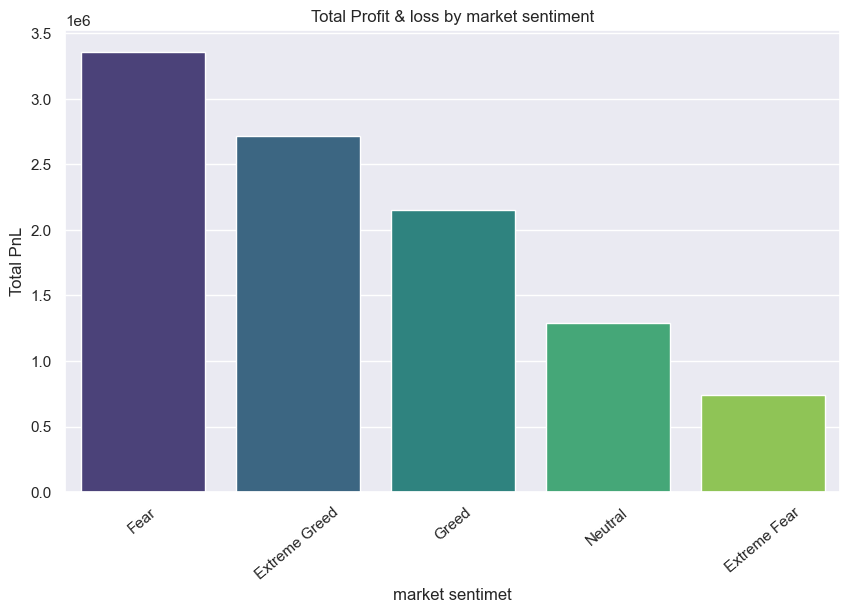

In [68]:
plt.figure(figsize=(10,6))

sns.barplot(x=sentiment_pref.index,
y = sentiment_pref["Total_PnL"],palette = 'viridis')

plt.title("Total Profit & loss by market sentiment")

plt.ylabel('Total PnL')
plt.xlabel('market sentimet')
plt.xticks(rotation = 40)
plt.show()

In [86]:
# 1. Profitability: Avg PnL, Win Rate
# 2. Leverge: Avg Leverage used
# 3. Risk: Standard Deviation of PnL 


df ['win'] = df['Closed PnL']>0

final_stats = df.groupby("classification").agg(
    Total_PnL = ("Closed PnL",'sum'),
    Avg_PnL = ('Closed PnL','mean'),
    Trade_Volumn= ('Closed PnL','count'),
    Risk_velocity = ("Closed PnL",'std'),
    win_rate = ('win','mean')).sort_values (by='Total_PnL',ascending = False)

final_stats['win_rate'] = final_stats['win_rate']*100
final_stats


,Total_PnL,Avg_PnL,Trade_Volumn,Risk_velocity,win_rate
classification,,,,,
Fear,3.357155e+06,54.290400,61837,935.355438,42.076750
Extreme Greed,2.715171e+06,67.892861,39992,766.828294,46.494299
Greed,2.150129e+06,42.743559,50303,1116.028390,38.482794
Neutral,1.292921e+06,34.307718,37686,517.122220,39.699093
Extreme Fear,7.391102e+05,34.537862,21400,1136.056091,37.060748


In [87]:
final_stats.to_csv('Sentiment_Analysis_Report.csv')
print("Report saved succesfully!")

Report saved succesfully!


In [85]:
print(df.columns.tolist())

['Account', 'Coin', 'Execution Price', 'Size Tokens', 'Size USD', 'Side', 'Timestamp IST', 'Start Position', 'Direction', 'Closed PnL', 'Transaction Hash', 'Order ID', 'Crossed', 'Fee', 'Trade ID', 'Timestamp', 'Date_Full', 'Date', 'value', 'classification', 'win']


In [90]:
print("=== TRADING STRATEGY INSIGHTS ===")
print("1. BEST TIME TO TRADE: Market jab 'Fear' mein ho. (Max Profit potential)")
print("2. HIGHEST ACCURACY: Market jab 'Extreme Greed' mein ho. (Safe trading)")
print("3. CAUTION: 'Extreme Fear' mein trade kam karein, kyunki profit aur volume dono kam hain.")

=== TRADING STRATEGY INSIGHTS ===
1. BEST TIME TO TRADE: Market jab 'Fear' mein ho. (Max Profit potential)
2. HIGHEST ACCURACY: Market jab 'Extreme Greed' mein ho. (Safe trading)
3. CAUTION: 'Extreme Fear' mein trade kam karein, kyunki profit aur volume dono kam hain.
